In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score,confusion_matrix
# Load the Housedata dataset
df = pd.read_csv('data.csv')
#To display the Columns in dataset
df.columns
# Display the first five rows of the dataset
print(df.head())


                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    str

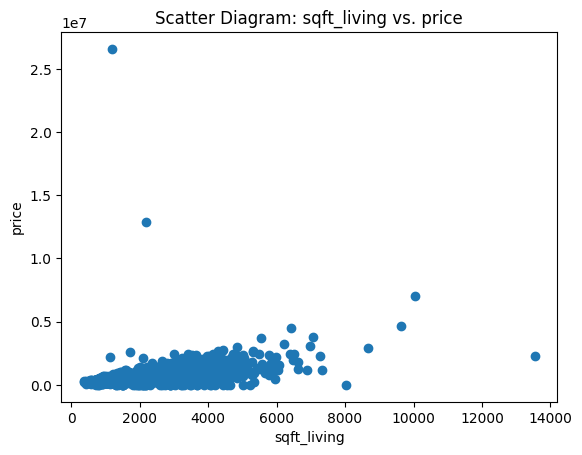

In [2]:
plt.scatter(df['sqft_living'], df['price'])
plt.title('Scatter Diagram: sqft_living vs. price')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()


In [3]:
correlation_coefficient = df['sqft_living'].corr(df['price'])
print(f'Correlation Coefficient (sqft_living vs. price): {correlation_coefficient}\n\n')

# Simple Linear Regression
X_simple = sm.add_constant(df[['sqft_living']])
y_simple = df['price']
model_simple = sm.OLS(y_simple, X_simple).fit()
9
# Summary of the simple linear regression
print(model_simple.summary())


Correlation Coefficient (sqft_living vs. price): 0.430410025432628


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     1045.
Date:                Fri, 29 Nov 2024   Prob (F-statistic):          7.55e-207
Time:                        17:03:44   Log-Likelihood:                -66971.
No. Observations:                4600   AIC:                         1.339e+05
Df Residuals:                    4598   BIC:                         1.340e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

In [4]:
X_multi = sm.add_constant(df[['sqft_living', 'bedrooms', 'bathrooms']])
y_multi = df['price']
model_multi = sm.OLS(y_multi, X_multi).fit()
# Summary of the multiple linear regression
print(model_multi.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     359.8
Date:                Fri, 29 Nov 2024   Prob (F-statistic):          6.78e-210
Time:                        17:03:44   Log-Likelihood:                -66957.
No. Observations:                4600   AIC:                         1.339e+05
Df Residuals:                    4596   BIC:                         1.339e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.232e+05   3.02e+04      4.080      

In [5]:
predictions_simple = model_simple.predict(X_simple)
predictions_simple


0       350567.418016
1       932572.220763
2       499217.995341
3       516854.504515
4       501737.496651
            ...      
4595    393398.940296
4596    380801.433743
4597    771324.136885
4598    539530.016310
4599    388359.937675
Length: 4600, dtype: float64

In [6]:
X_multi = sm.add_constant(df[['sqft_living', 'bedrooms', 'bathrooms']])
y_multi = df['price']
model_multi = sm.OLS(y_multi, X_multi).fit()
predictions_multi = model_multi.predict(X_multi)
predictions_multipredictions_multi = model_multi.predict(X_multi)
predictions_multi


0       345726.155445
1       883214.890294
2       514428.895515
3       536981.112223
4       468684.238234
            ...      
4595    395744.662521
4596    391988.957691
4597    817716.458384
4598    503232.046882
4599    400228.844801
Length: 4600, dtype: float64

In [7]:
X_logistic = df[['sqft_living', 'waterfront']]
y_logistic = (df['price'] > df['price'].median()).astype(int)
# Binary target variable
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_logistic, y_logistic,
test_size=0.2, random_state=42)
print(X_logistic)
print(y_logistic)


      sqft_living  waterfront
0            1340           0
1            3650           0
2            1930           0
3            2000           0
4            1940           0
...           ...         ...
4595         1510           0
4596         1460           0
4597         3010           0
4598         2090           0
4599         1490           0

[4600 rows x 2 columns]
0       0
1       1
2       0
3       0
4       1
       ..
4595    0
4596    1
4597    0
4598    0
4599    0
Name: price, Length: 4600, dtype: int64


In [8]:
logreg = LogisticRegression()
logreg.fit(X_train_log, y_train_log)


LogisticRegression()

In [9]:
y_pred_log = logreg.predict(X_test_log)
y_pred_log


array([0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,

In [10]:
accuracy_log = accuracy_score(y_test_log, y_pred_log)
conf_matrix_log = confusion_matrix(y_test_log, y_pred_log)
print(f'Accuracy (Logistic Regression): {accuracy_log}')
print(f'Confusion Matrix (Logistic Regression): \n{conf_matrix_log}')


Accuracy (Logistic Regression): 0.7195652173913043
Confusion Matrix (Logistic Regression): 
[[351 119]
 [139 311]]
